In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint, solve_ivp
import plotly.graph_objects as go
from IPython.display import HTML
from time import time

from Mvt_Equations import Solve_Gyro_Forced_Fast as QDIM

from NeedForSpeed import*

Larmor Frequency (th) :               +6.653
Larmor Period (th) :               +0.944
Rabi Frequency (th) :               +1.501
Rabi Period (th) :               +4.186
Temps de montée (th) :               +2.093
Rapport des pulsations Larmor/Rabi :               +4.432
Temps de résolution 0.851485013961792


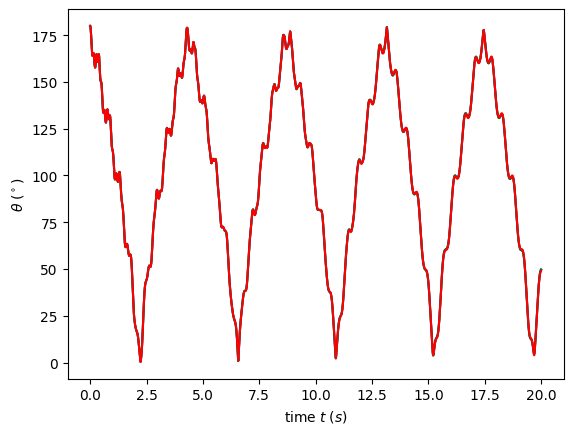

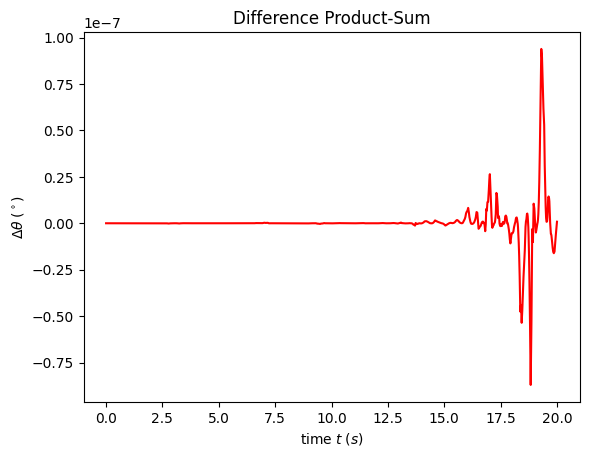

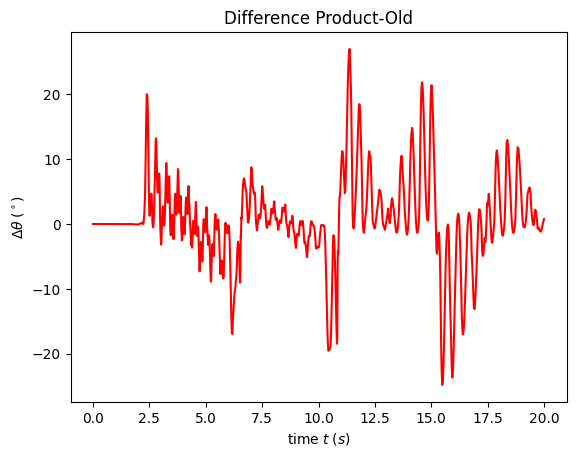

In [26]:
CI = [np.pi - 0.001, 0, 0, 0, 0, 2*np.pi*50]


g = 9.81
m = 0.375
J3 = 0.000055
J1 = 0.000055
h = 31.25 * 1e-3
x0 = 10 * 1e-2

p_psi_exp = CI[-1] * J3


omega_f = m * g * h / (p_psi_exp)

params_f = [g, m, h, J1, J3, x0, -np.pi,  omega_f / (2 * np.pi)]

print(f'Larmor Frequency (th) : {omega_f : >+20_.3f}')
print(f'Larmor Period (th) : {2 * np.pi / omega_f : >+20_.3f}')

omega_R_th = -0.5 * np.cos(params_f[-2]) * (m * h * x0 * (omega_f**2)) / p_psi_exp

print(f'Rabi Frequency (th) : {omega_R_th : >+20_.3f}')
print(f'Rabi Period (th) : {2 * np.pi / omega_R_th : >+20_.3f}')
print(f'Temps de montée (th) : {np.pi / omega_R_th : >+20_.3f}')


rapport_freq = float(omega_f / omega_R_th)
print(f'Rapport des pulsations Larmor/Rabi : {rapport_freq : >+20_.3f}')

params_f[-1] = 1.06

t1 = time()
t, the, phi, psi, the_d, phi_d, psi_d = Solve_Gyro_Forced_Fast(0, 20, CI, params_f, solving_method='RK23')
t_sum, the_sum, phit, psit, the_dt, phi_dt, psi_dt = Solve_Gyro_Forced_Fast_SUM(0, 20, CI, params_f, solving_method='RK23')
tt, thet, phit, psit, the_dt, phi_dt, psi_dt = QDIM(0, 20, CI, params_f, solving_method='RK23')

t2 = time()
print('Temps de résolution', t2 - t1)

plt.figure()
plt.plot(t, the * 180 / np.pi, 'b', label='Product')
plt.plot(t_sum, the_sum * 180 / np.pi, 'g', label='Sum')
plt.plot(tt, thet * 180 / np.pi, 'r', label='Old')
plt.xlabel(r'time $t \; (s)$')
plt.ylabel(r'$\theta \; (^\circ)$')
plt.show()


m = np.min([len(the), len(the_sum)])

plt.figure()
plt.plot(t[:m], (the[:m] - the_sum[:m]) * 180 / np.pi, 'r')
plt.xlabel(r'time $t \; (s)$')
plt.ylabel(r'$\Delta \theta \; (^\circ)$')
plt.title('Difference Product-Sum')
plt.show()


n = np.min([len(the), len(thet)])

plt.figure()
plt.plot(t[:n], (the[:n] - thet[:n]) * 180 / np.pi, 'r')
plt.xlabel(r'time $t \; (s)$')
plt.ylabel(r'$\Delta \theta \; (^\circ)$')
plt.title('Difference Product-Old')

plt.show()